# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime as dt
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_df = pd.DataFrame({"City": cities})
weather_df

,City
0,colquechaca
1,ushuaia
2,samusu
3,mahebourg
4,liverpool
...,...
593,agirish
594,moroni
595,taminango
596,galiwinku


In [4]:
weather_df["Cloudiness"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Humidity"] = ""
weather_df["Lat"] = ""
weather_df["Lng"] = ""
weather_df["Max Temp"] = ""
weather_df["Wind Speed"] = ""

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,colquechaca,,,,,,,,
1,ushuaia,,,,,,,,
2,samusu,,,,,,,,
3,mahebourg,,,,,,,,
4,liverpool,,,,,,,,


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


parameters = {"units": units,
             "appid": weather_api_key}

print("Beginning Data Retrieval")
print("-----------------------------")

for index, row in weather_df.iterrows():
    parameters["q"] = row["City"]
    response = requests.get(url, params=parameters).json()
    
    try:        
        weather_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        weather_df.loc[index, "Country"] = response["sys"]["country"]
        weather_df.loc[index, "Date"] = response["dt"]
        weather_df.loc[index, "Humidity"] = response["main"]["humidity"]
        weather_df.loc[index, "Lat"] = response["coord"]["lat"]
        weather_df.loc[index, "Lng"] = response["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        
        print(f"Processing Record {index} | {row['City']}")
              
    except (KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 | colquechaca
Processing Record 1 | ushuaia
City not found. Skipping...
Processing Record 3 | mahebourg
Processing Record 4 | liverpool
City not found. Skipping...
Processing Record 6 | hermanus
Processing Record 7 | atar
Processing Record 8 | bose
Processing Record 9 | hobart
Processing Record 10 | castro
City not found. Skipping...
Processing Record 12 | kapaa
City not found. Skipping...
Processing Record 14 | preston
Processing Record 15 | fortuna
Processing Record 16 | butaritari
Processing Record 17 | bredasdorp
City not found. Skipping...
Processing Record 19 | bam
City not found. Skipping...
Processing Record 21 | mar del plata
Processing Record 22 | punta arenas
Processing Record 23 | upernavik
Processing Record 24 | mayumba
Processing Record 25 | nome
Processing Record 26 | guider
Processing Record 27 | puerto ayora
Processing Record 28 | mount gambier
Processing Record 29 | esperance
Processing Record 

Processing Record 250 | soyo
Processing Record 251 | kodiak
Processing Record 252 | pilar
Processing Record 253 | rize
Processing Record 254 | bathsheba
Processing Record 255 | patrasaer
Processing Record 256 | pangnirtung
Processing Record 257 | port said
Processing Record 258 | kaitangata
Processing Record 259 | valley city
Processing Record 260 | adrar
Processing Record 261 | zhigansk
Processing Record 262 | burnie
Processing Record 263 | port hardy
Processing Record 264 | luderitz
Processing Record 265 | salo
Processing Record 266 | san quintin
Processing Record 267 | ara
Processing Record 268 | zig
Processing Record 269 | yar-sale
Processing Record 270 | fukue
Processing Record 271 | sambava
Processing Record 272 | rion
Processing Record 273 | smolyaninovo
Processing Record 274 | ceres
Processing Record 275 | constitucion
Processing Record 276 | road town
Processing Record 277 | naze
Processing Record 278 | hami
Processing Record 279 | saldanha
Processing Record 280 | singaparna
P

Processing Record 501 | necochea
Processing Record 502 | obidos
Processing Record 503 | marinette
Processing Record 504 | lukulu
Processing Record 505 | ballyshannon
Processing Record 506 | urbano santos
Processing Record 507 | verkhnevilyuysk
City not found. Skipping...
Processing Record 509 | ati
Processing Record 510 | taft
Processing Record 511 | seoul
Processing Record 512 | talcahuano
Processing Record 513 | masvingo
Processing Record 514 | san patricio
City not found. Skipping...
City not found. Skipping...
Processing Record 517 | kavieng
Processing Record 518 | chau doc
Processing Record 519 | batagay-alyta
Processing Record 520 | xam nua
Processing Record 521 | plettenberg bay
Processing Record 522 | henties bay
Processing Record 523 | vestmanna
Processing Record 524 | walvis bay
Processing Record 525 | namatanai
Processing Record 526 | yuli
Processing Record 527 | dryden
Processing Record 528 | chinhoyi
City not found. Skipping...
Processing Record 530 | soe
Processing Record

In [6]:
weather_df.replace("", "NaN", inplace=True)

weather_df["Date"] = weather_df["Date"].astype(float)
weather_df["Lat"] = weather_df["Lat"].astype(float)
weather_df["Lng"] = weather_df["Lng"].astype(float)
weather_df["Max Temp"] = weather_df["Max Temp"].astype(float)
weather_df["Wind Speed"] = weather_df["Wind Speed"].astype(float)

weather_df.dropna(inplace=True)

weather_df["Cloudiness"] = weather_df["Cloudiness"].astype(int)
weather_df["Humidity"] = weather_df["Humidity"].astype(int)

weather_df.reset_index(drop=True, inplace=True)

weather_df.index.name = "City_ID"

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [8]:
weather_df.to_csv("Cities.csv")
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,colquechaca,90,BO,1.599492e+09,60,-18.67,-66.02,44.4,6.26
1,ushuaia,100,AR,1.599492e+09,70,-54.80,-68.30,39.2,5.82
2,mahebourg,75,MU,1.599492e+09,88,-20.41,57.70,73.4,11.07
3,liverpool,40,GB,1.599492e+09,82,53.41,-2.98,64.4,16.11
4,hermanus,0,ZA,1.599492e+09,70,-34.42,19.23,70.0,8.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
date = weather_df.loc[0, ["Date"]]
date = dt.datetime.fromtimestamp(date)
date_string = date.strftime("%m/%d/%Y")
date_string

'09/07/2020'

#### Latitude vs. Temperature Plot

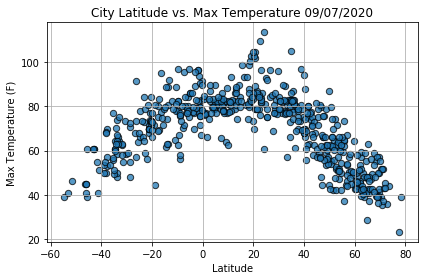

In [10]:
weather_df.plot(kind="scatter", x="Lat", y="Max Temp", title = f"City Latitude vs. Max Temperature {date_string}",
                edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()

plt.savefig("fig1.png")

Here the maximum temperature of cities plotted against their latitude. The trend shows that max temperatures decrease the farther from the equator the city is.

#### Latitude vs. Humidity Plot

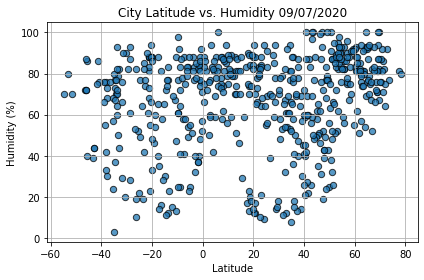

In [11]:
weather_df.plot(kind="scatter", x="Lat", y="Humidity", title=f"City Latitude vs. Humidity {date_string}",
               edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

plt.savefig("fig2.png")

Here the humidity of cities is plotted against their latitude. There doesn't seem to be a strong trend between humidity and latitude.

#### Latitude vs. Cloudiness Plot

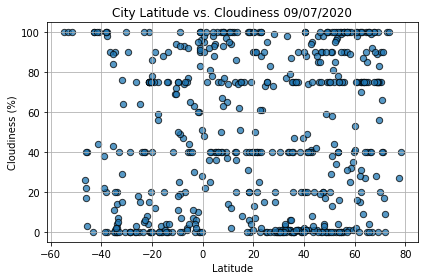

In [12]:
weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", title=f"City Latitude vs. Cloudiness {date_string}",
               edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()

plt.savefig("fig3.png")

Here the cloudiness of cities plotted against their latitude. There seems to be horizontal lines along the easily divisible numbers weathermen like to forecast data on.

#### Latitude vs. Wind Speed Plot

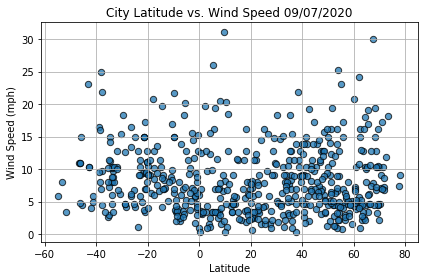

In [13]:
weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", title=f"City Latitude vs. Wind Speed {date_string}",
               edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout()

plt.savefig("fig4.png")

Here the wind speed of cities is plotted against their latitude. It appears that higher wind speeds occur farther from the equator.

## Linear Regression

In [14]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0,:]
Southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0,:]

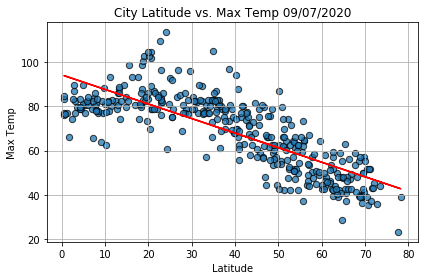

The r-squared is: 0.6335543469585945.


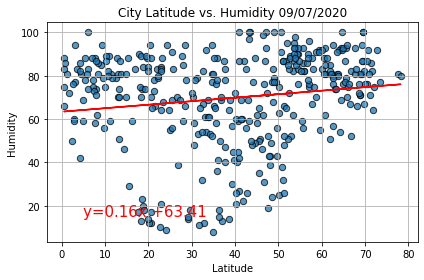

The r-squared is: 0.022889314172019212.


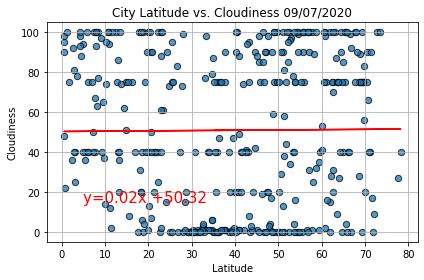

The r-squared is: 6.808811949965133e-05.


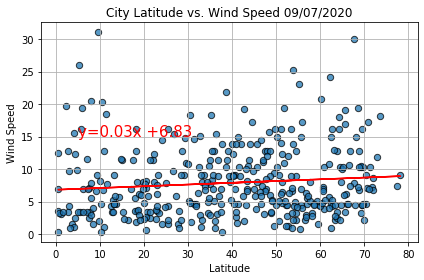

The r-squared is: 0.01061509191553091.


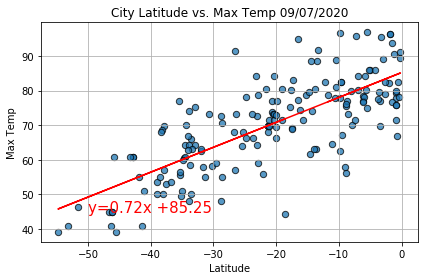

The r-squared is: 0.571221307005426.


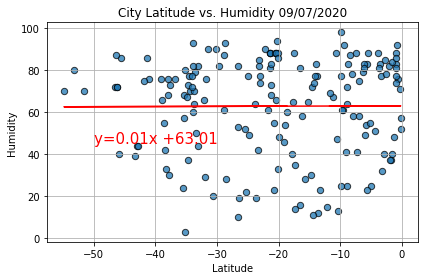

The r-squared is: 2.43491912795916e-05.


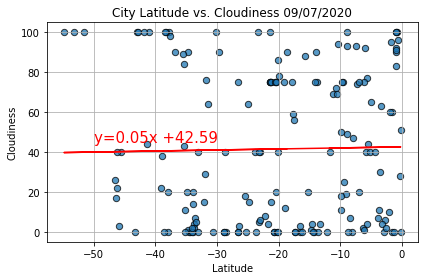

The r-squared is: 0.0003674917550366538.


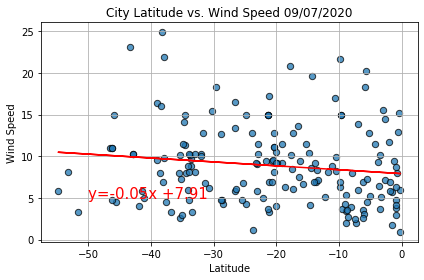

The r-squared is: 0.018833448813244474.


In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
hemispheres = [Northern_hemisphere, Southern_hemisphere]

for hemisphere in hemispheres:
    conditions = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
    for condition in conditions:
        hemisphere.plot(kind="scatter", x="Lat", y=f"{condition}", title = f"City Latitude vs. {condition} {date_string}",
                edgecolor="black", s=40, alpha=0.75)
        plt.xlabel("Latitude")
        plt.ylabel(f"{condition}")
        plt.grid()
        plt.tight_layout()

        (slope, intercept, rvalue, pvalue, stderr) = linregress(hemisphere["Lat"], hemisphere[f"{condition}"])
        regress_values = hemisphere["Lat"]*slope + intercept
        line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
        plt.plot(hemisphere["Lat"], regress_values, "r-")
        if hemisphere.iloc[0,0] == Northern_hemisphere.iloc[0,0]:
            plt.annotate(line_eq, (5,15), fontsize=15, color="red")
        elif (hemisphere.iloc[0,0] == Southern_hemisphere.iloc[0,0]) & (condition != "Wind Speed"):
            plt.annotate(line_eq, (-50,45), fontsize=15, color="red")
        else:
            plt.annotate(line_eq, (-50,5), fontsize=15, color="red")
            
        plt.show()
        
        print(f"The r-squared is: {rvalue**2}.")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

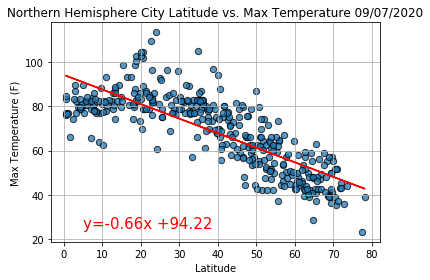

The r-squared is: 0.6335543469585945.


<Figure size 432x288 with 0 Axes>

In [17]:
Northern_hemisphere.plot(kind="scatter", x="Lat", y="Max Temp",
                         title = f"Northern Hemisphere City Latitude vs. Max Temperature {date_string}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern_hemisphere["Lat"], Northern_hemisphere["Max Temp"])
regress_values = Northern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Northern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (5,25), fontsize=15, color="red")

plt.show()

plt.savefig("../static/images/northHemisphereTemperature.png")

print(f"The r-squared is: {rvalue**2}.")

Here cities in the northern hemisphere have their maximum temperatures charted against their latitude. The trend shows that the farther from the equator a city is the lower its maximum temperature

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

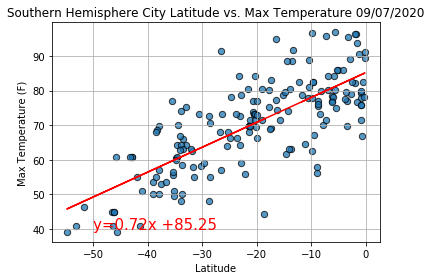

The r-squared is: 0.571221307005426.


<Figure size 432x288 with 0 Axes>

In [18]:
Southern_hemisphere.plot(kind="scatter", x="Lat", y="Max Temp",
                         title = f"Southern Hemisphere City Latitude vs. Max Temperature {date_string}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Southern_hemisphere["Lat"], Southern_hemisphere["Max Temp"])
regress_values = Southern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Southern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-50,40), fontsize=15, color="red")

plt.show()

plt.savefig("../static/images/southHemisphereTemperature.png")

print(f"The r-squared is: {rvalue**2}.")

Here cities in the southern hemisphere have their maximum temperature charted against their latitude. The trend shows higher maximum temperatures closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

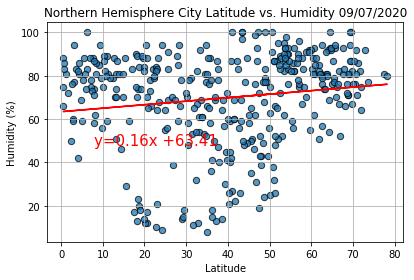

The r-squared is: 0.022889314172019212.


<Figure size 432x288 with 0 Axes>

In [19]:
Northern_hemisphere.plot(kind="scatter", x="Lat", y="Humidity",
                         title = f"Northern Hemisphere City Latitude vs. Humidity {date_string}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern_hemisphere["Lat"], Northern_hemisphere["Humidity"])
regress_values = Northern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Northern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (8,48), fontsize=15, color="red")

plt.show()

plt.savefig("../static/images/northHemisphereHumidity.png")

print(f"The r-squared is: {rvalue**2}.")

Here cities in the northern hemisphere have their humidity charted against their latitude. There doesn't seem to be a strong trend between humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

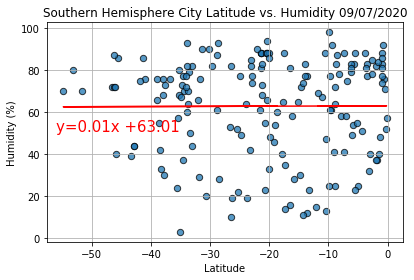

The r-squared is: 2.43491912795916e-05.


<Figure size 432x288 with 0 Axes>

In [20]:
Southern_hemisphere.plot(kind="scatter", x="Lat", y="Humidity",
                         title = f"Southern Hemisphere City Latitude vs. Humidity {date_string}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Southern_hemisphere["Lat"], Southern_hemisphere["Humidity"])
regress_values = Southern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Southern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-56,51), fontsize=15, color="red")

plt.show()

plt.savefig("../static/images/southHemisphereHumidity.png")

print(f"The r-squared is: {rvalue**2}.")

Here cities in the southern hemisphere have their humidity charted against their latitude. There doesn't seem to be a strong trend between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

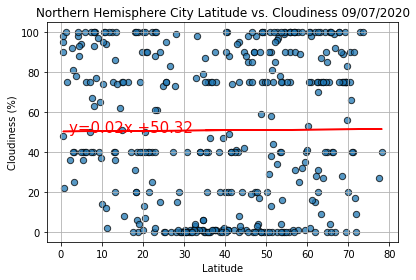

The r-squared is: 6.808811949965133e-05.


<Figure size 432x288 with 0 Axes>

In [21]:
Northern_hemisphere.plot(kind="scatter", x="Lat", y="Cloudiness",
                         title = f"Northern Hemisphere City Latitude vs. Cloudiness {date_string}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern_hemisphere["Lat"], Northern_hemisphere["Cloudiness"])
regress_values = Northern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Northern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (2,50), fontsize=15, color="red")

plt.show()

plt.savefig("../static/images/northHemisphereCloudiness.png")

print(f"The r-squared is: {rvalue**2}.")

Here cities in the northern hemisphere have their cloud coverage plotted against their latitude. There seems to be horizontal groupings of data along easily chosen estimates for cloud coverage.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

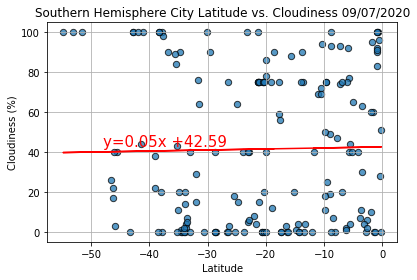

The r-squared is: 0.0003674917550366538.


<Figure size 432x288 with 0 Axes>

In [22]:
Southern_hemisphere.plot(kind="scatter", x="Lat", y="Cloudiness",
                         title = f"Southern Hemisphere City Latitude vs. Cloudiness {date_string}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Southern_hemisphere["Lat"], Southern_hemisphere["Cloudiness"])
regress_values = Southern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Southern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-48,43), fontsize=15, color="red")

plt.show()

plt.savefig("../static/images/southHemisphereCloudiness.png")

print(f"The r-squared is: {rvalue**2}.")

Here cities in the southern hemisphere have their cloud coverage plotted against their latitude. There doesn't seem to be a strong correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

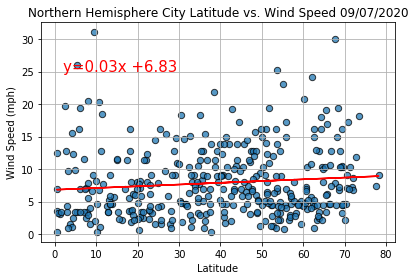

The r-squared is: 0.01061509191553091.


<Figure size 432x288 with 0 Axes>

In [23]:
Northern_hemisphere.plot(kind="scatter", x="Lat", y="Wind Speed",
                         title = f"Northern Hemisphere City Latitude vs. Wind Speed {date_string}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern_hemisphere["Lat"], Northern_hemisphere["Wind Speed"])
regress_values = Northern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Northern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (2,25), fontsize=15, color="red")

plt.show()

plt.savefig("../static/images/northHemisphereWindSpeed.png")

print(f"The r-squared is: {rvalue**2}.")

Here cities in the northern hemisphere have their wind speed on April 5th 2020 charted against their latitude. There seems to be higher wind speeds farther from the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

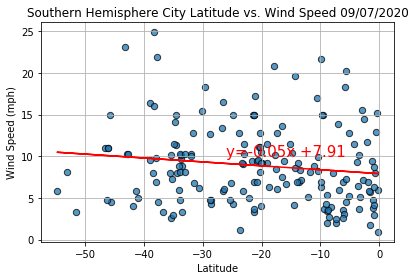

The r-squared is: 0.018833448813244474.


<Figure size 432x288 with 0 Axes>

In [24]:
Southern_hemisphere.plot(kind="scatter", x="Lat", y="Wind Speed",
                         title = f"Southern Hemisphere City Latitude vs. Wind Speed {date_string}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Southern_hemisphere["Lat"], Southern_hemisphere["Wind Speed"])
regress_values = Southern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Southern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-26,10), fontsize=15, color="red")

plt.show()

plt.savefig("../static/images/southHemisphereWindSpeed.png")

print(f"The r-squared is: {rvalue**2}.")

Here cities in the southern hemisphere have their wind speed on April 5th 2020 plotted against their latitude. There seems to be higher wind speeds farther from the equator.